In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
# Configuración de estilo
sns.set(style="whitegrid")

# Cargar el dataset
data = pd.read_csv('/content/drive/MyDrive/Airbnb/airbnb_us.csv')

data

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,750.0
1,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,115.0
2,12422935,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,...,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
3,180792,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,...,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,120.0
4,2658946,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.5,Real Bed,strict,True,DC,...,-77.031189,Charming 2 bdrm in trendy U/14th streets w/par...,U Street Corridor,13,89.0,NaN,20009,2.0,3.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19304,18997559,House,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,2.5,Real Bed,flexible,False,DC,...,-76.980518,Charming H St/Rosedale Rowhouse,NaN,3,90.0,https://a0.muscache.com/im/pictures/8ba850b8-7...,20002,2.0,2.0,135.0
19305,18395940,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,2.0,Real Bed,strict,True,Chicago,...,-87.641210,"Amazing 2-BR Apt in Old Town! Eat,Drink,Beach&...",Old Town,15,96.0,https://a0.muscache.com/im/pictures/688bc96a-3...,60610,2.0,3.0,110.0
19306,14838304,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,True,DC,...,-77.028127,Full Rowhouse w/Patio & Balcony,Columbia Heights,19,91.0,https://a0.muscache.com/im/pictures/57358607/3...,20009,1.0,1.0,141.0
19307,11829011,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,True,SF,...,-122.407384,WorldMark W'ndm Union Square Studio,Union Square,24,98.0,https://a0.muscache.com/im/pictures/9a99e2de-c...,94108,1.0,1.0,170.0


# PARTE 1: Análisis Exploratorio de Datos (EDA)

In [ ]:
# 1.1 - Visualizar las primeras filas y la información general del dataset
print("\nInformación del dataset:")
print(data.info())
print("\nDescripción estadística de las variables numéricas:")
print(data.describe())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      19309 non-null  int64  
 1   property_type           19309 non-null  object 
 2   room_type               19309 non-null  object 
 3   amenities               19309 non-null  object 
 4   accommodates            19309 non-null  int64  
 5   bathrooms               19274 non-null  float64
 6   bed_type                19309 non-null  object 
 7   cancellation_policy     19309 non-null  object 
 8   cleaning_fee            19309 non-null  bool   
 9   city                    19309 non-null  object 
 10  description             19309 non-null  object 
 11  first_review            15355 non-null  object 
 12  host_has_profile_pic    19306 non-null  object 
 13  host_identity_verified  19306 non-null  object 
 14  host_respons

In [ ]:
# 1.2 - Visualización de valores faltantes
missing_values = data.isnull().sum()
print("\nValores faltantes por columna:\n", missing_values[missing_values > 0])


Valores faltantes por columna:
 bathrooms                   35
first_review              3954
host_has_profile_pic         3
host_identity_verified       3
host_response_rate        4296
host_since                   3
last_review               3954
neighbourhood             1458
review_scores_rating      4134
thumbnail_url             2402
zipcode                    225
bedrooms                    17
beds                        24
dtype: int64


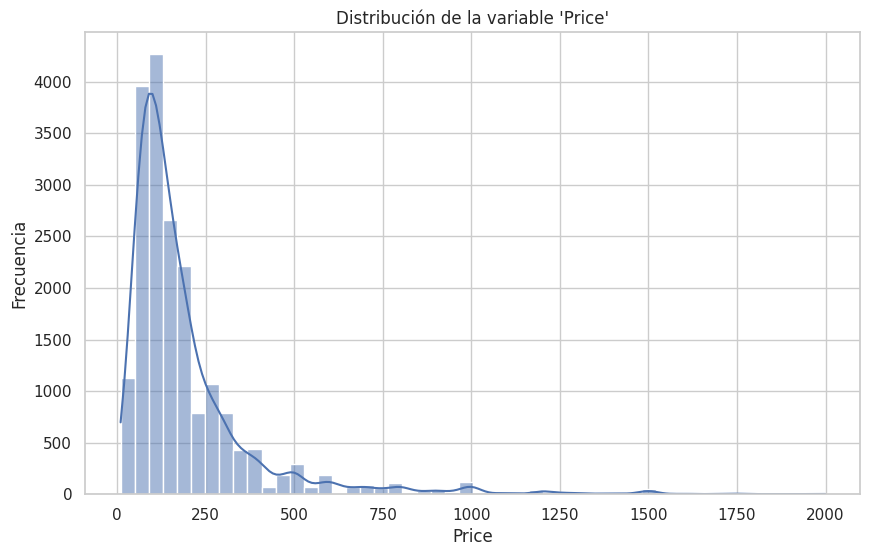

In [ ]:
# 1.3 - Distribución de la variable objetivo 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title("Distribución de la variable 'Price'")
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
# 1.4 - Análisis de correlación con la variable 'Price'

# Encodage one-hot de manière sélective pour les colonnes nécessaires
data_encoded = pd.get_dummies(data, drop_first=True)

# Calculer les corrélations avec 'Price' seulement
correlations_price = data_encoded.corrwith(data_encoded['price'])

# Afficher les 10 variables les plus corrélées avec 'Price'
print("\nVariables les plus corrélées avec 'Price':\n", correlations_price.sort_values(ascending=False).head(10))




Variables les plus corrélées avec 'Price':
 price                         1.000000
accommodates                  0.442621
bedrooms                      0.437482
beds                          0.374791
bathrooms                     0.365740
city_SF                       0.112401
review_scores_rating          0.102133
neighbourhood_Capitol Hill    0.095454
city_DC                       0.072580
zipcode_94123                 0.072252
dtype: float64



Variables categóricas en el dataset: Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'name',
       'neighbourhood', 'thumbnail_url', 'zipcode'],
      dtype='object')


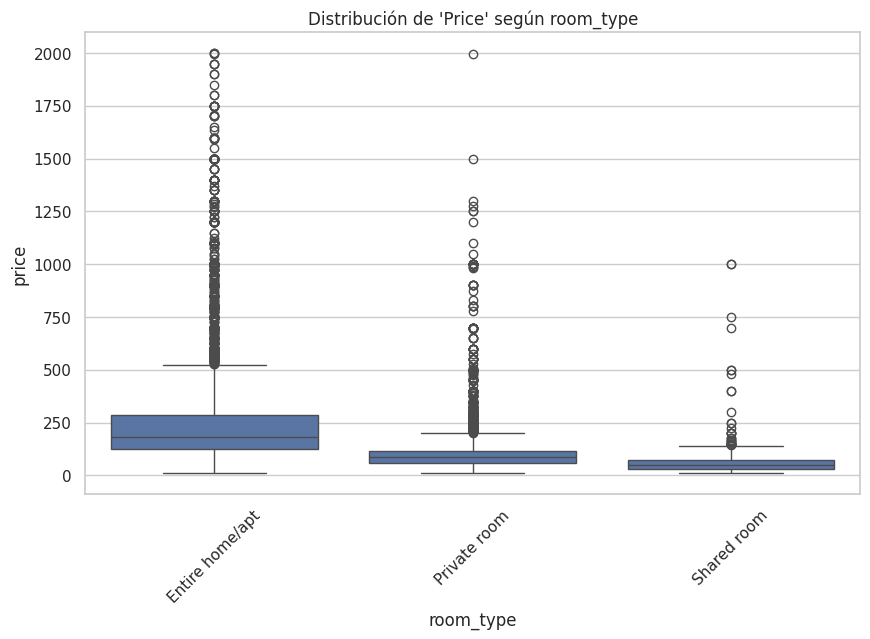

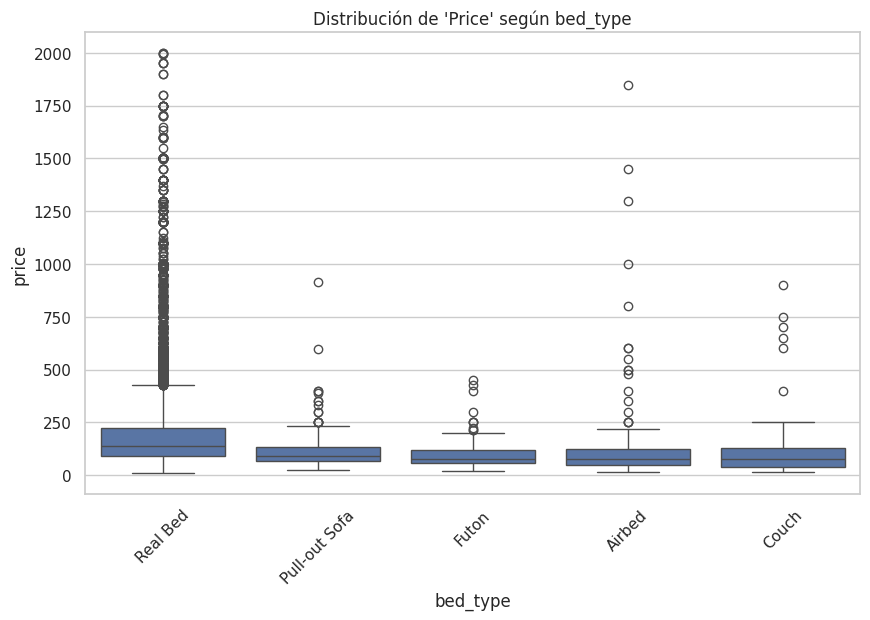

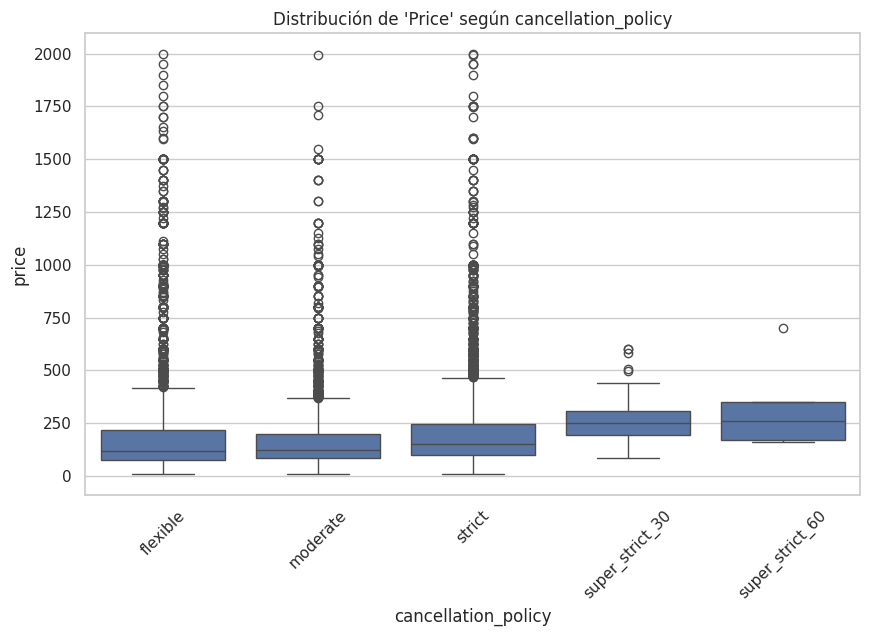

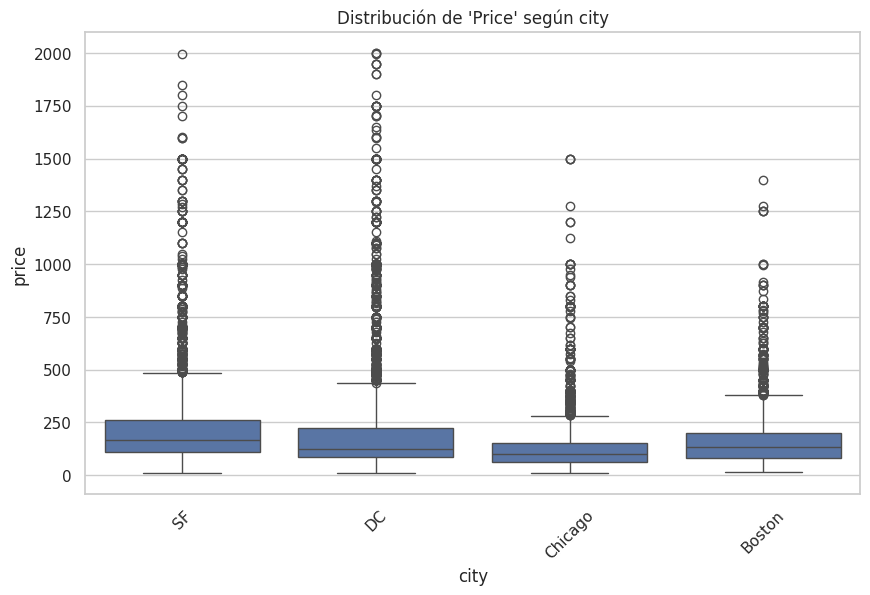

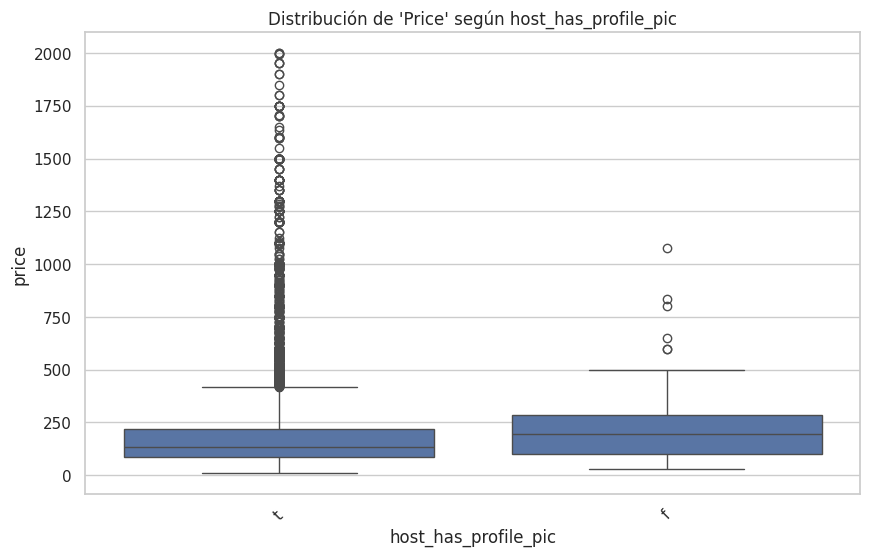

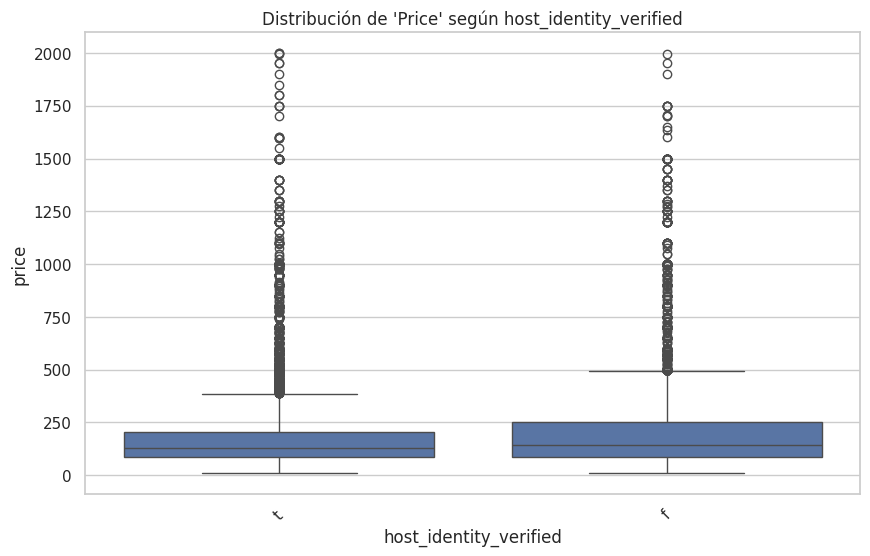

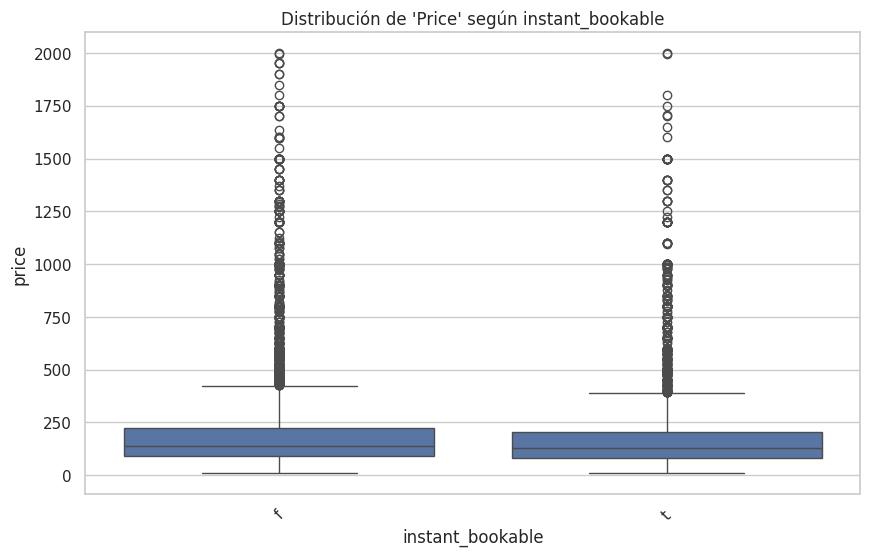

In [ ]:
# 1.5 - Análisis de algunas variables categóricas (si existen) y su relación con el precio
categorical_vars = data.select_dtypes(include=['object']).columns
print("\nVariables categóricas en el dataset:", categorical_vars)

# Analizar el impacto de algunas variables categóricas en el precio
for cat_var in categorical_vars:
    if data[cat_var].nunique() < 10:  # Limitar el número de categorías para facilidad de visualización
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=data, x=cat_var, y='price')
        plt.title(f"Distribución de 'Price' según {cat_var}")
        plt.xticks(rotation=45)
        plt.show()


Variables numériques après suppression : ['accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'price']


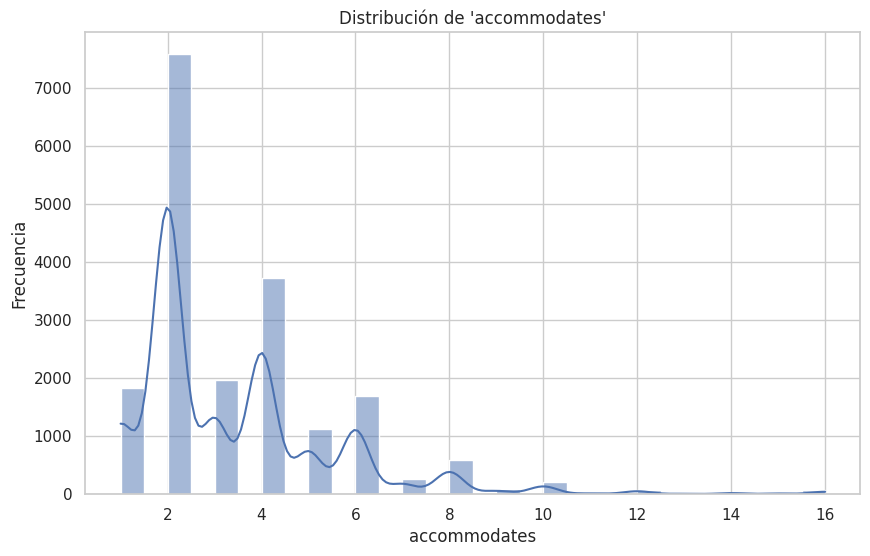

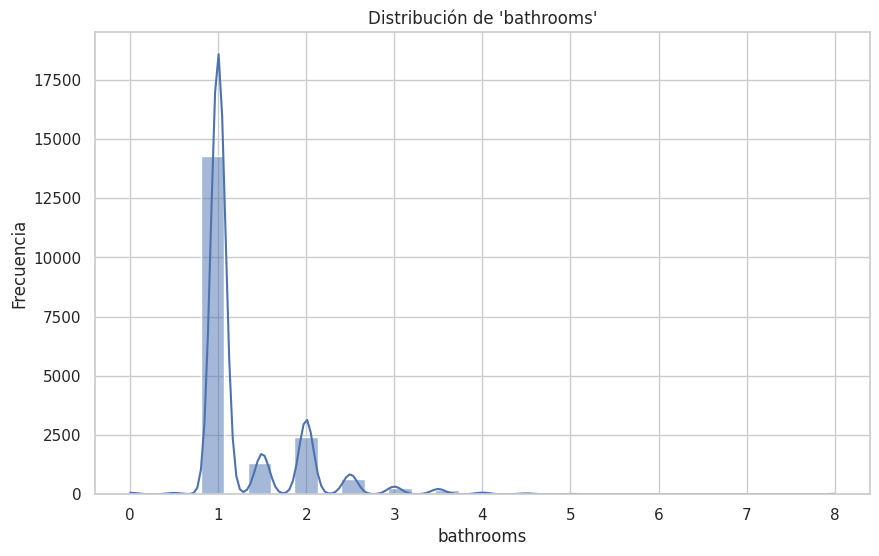

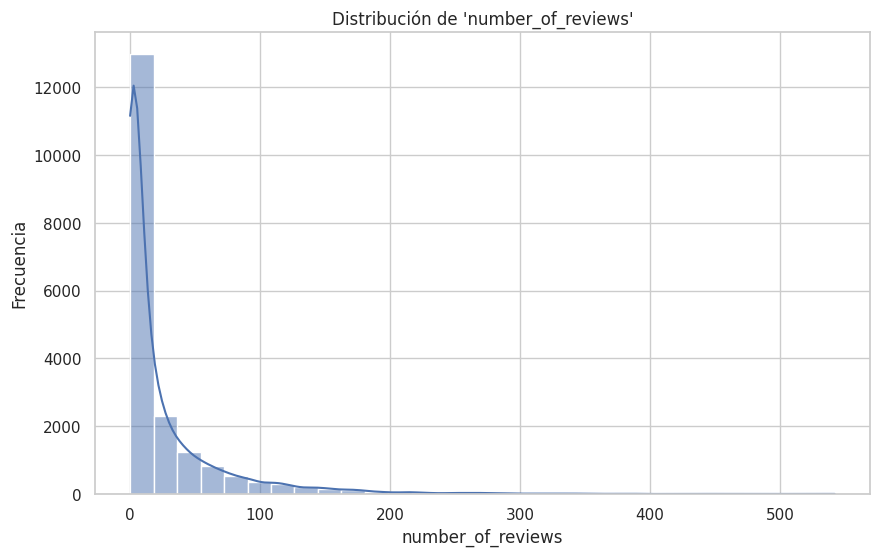

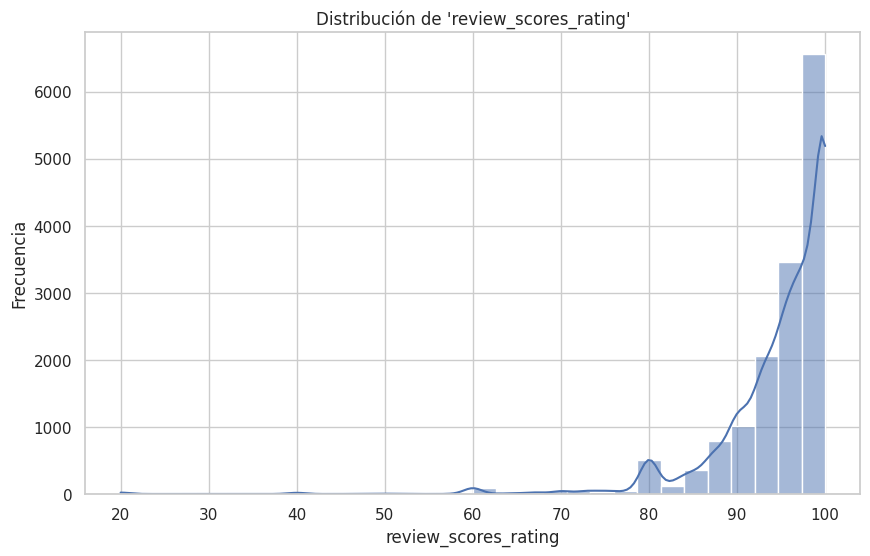

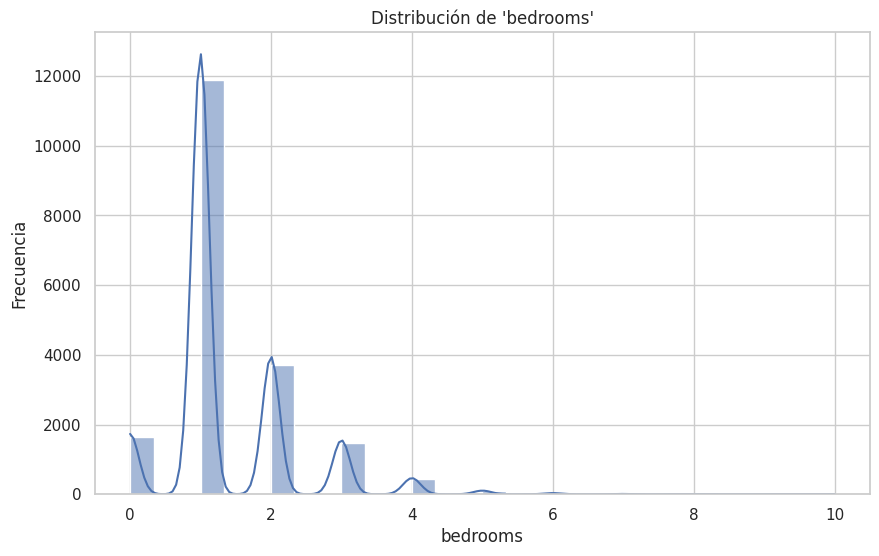

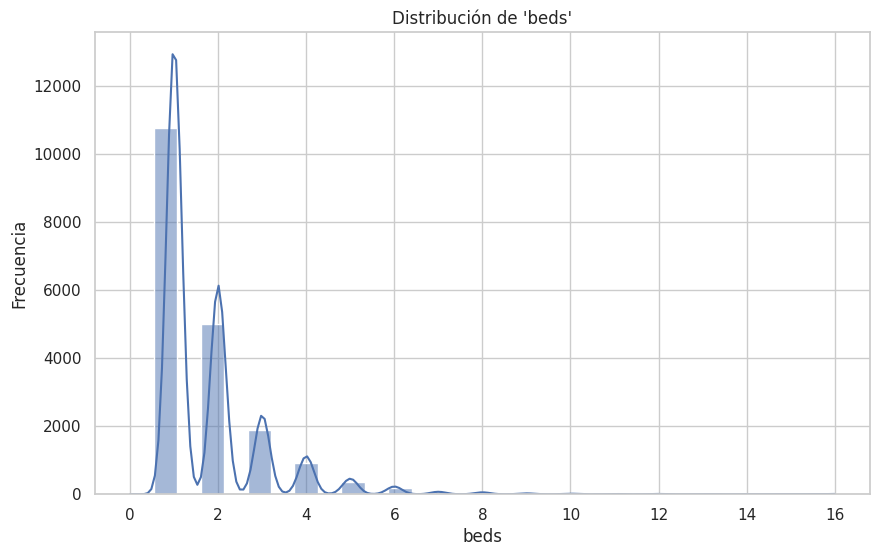

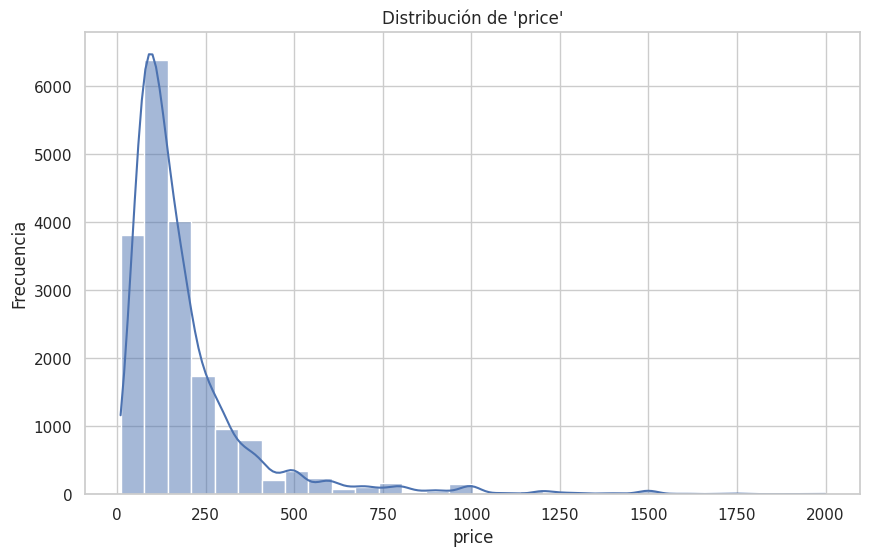

In [ ]:
# 1.6 - Análisis de la distribución de algunas variables numéricas

# Utiliser une compréhension de liste pour filtrer
numerical_vars = [col for col in numerical_vars if col not in ['id', 'longitude', 'latitude']]
print("\nVariables numériques après suppression :", numerical_vars)

# Analizar la distribución de algunas variables numéricas
for num_var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[num_var].dropna(), kde=True, bins=30)
    plt.title(f"Distribución de '{num_var}'")
    plt.xlabel(num_var)
    plt.ylabel("Frecuencia")
    plt.show()

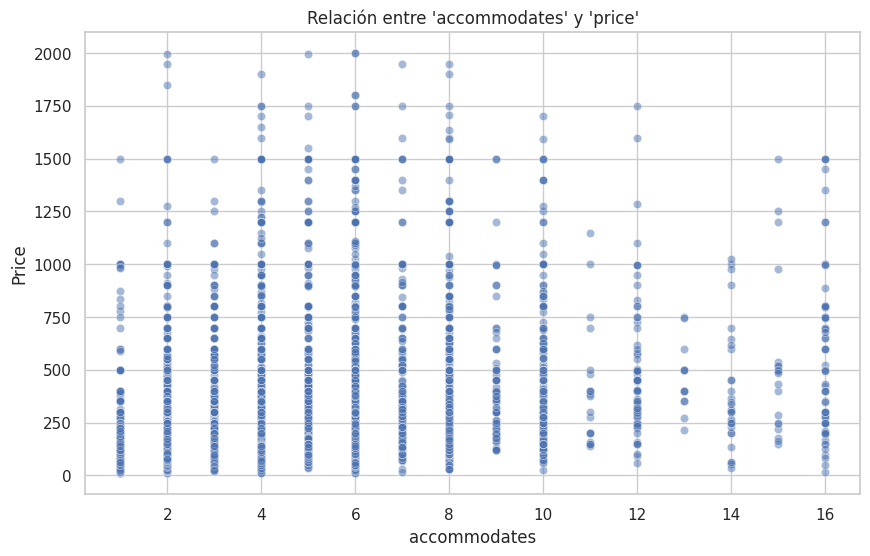

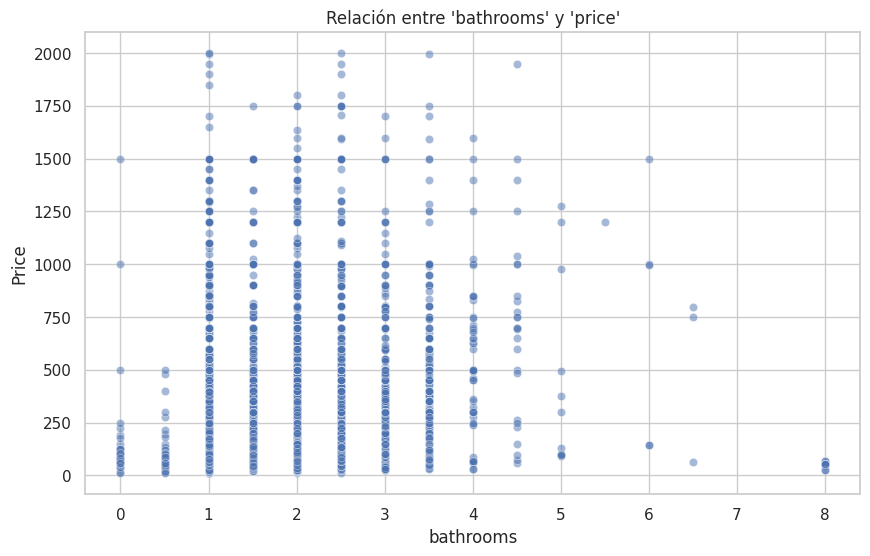

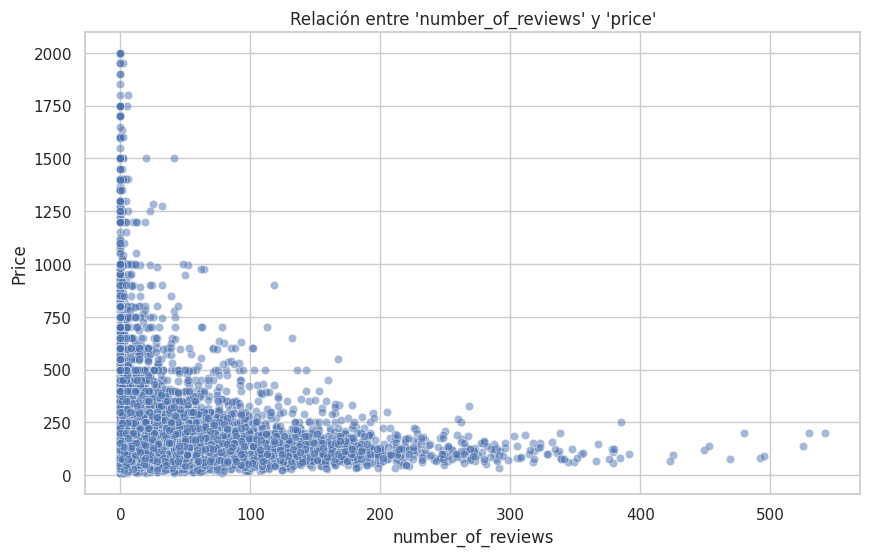

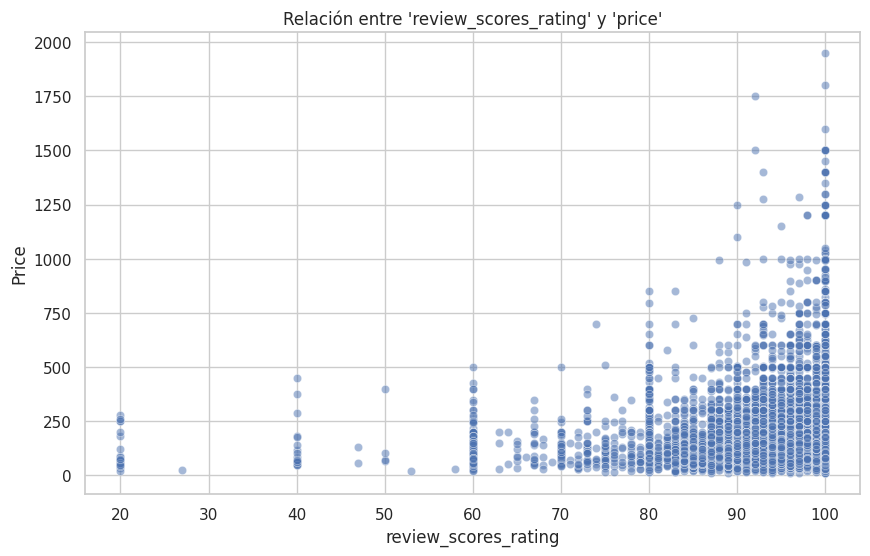

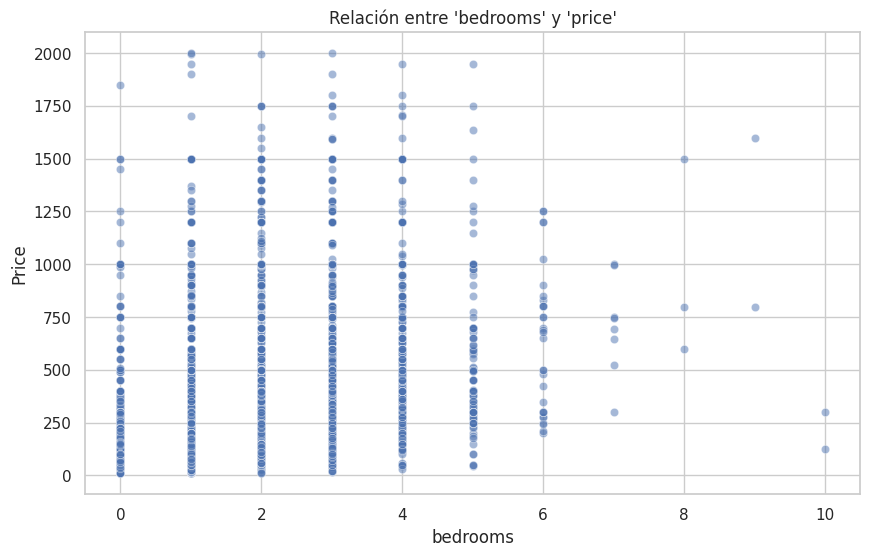

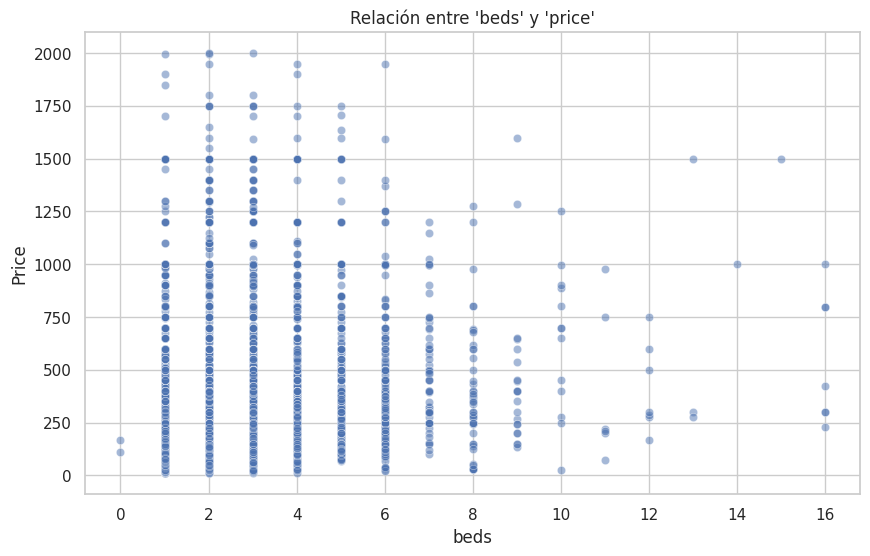

In [ ]:
# 1.7 - Relación entre las variables numéricas y 'Price' usando gráficos de dispersión
for num_var in numerical_vars:
    if num_var != 'price':  # Excluir la variable objetivo
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=num_var, y='price', alpha=0.5)
        plt.title(f"Relación entre '{num_var}' y 'price'")
        plt.xlabel(num_var)
        plt.ylabel("Price")
        plt.show()
